In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
import re
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Se carga la libreria drive de google para cargar los archivos almacenados en drive
drive.mount("/content/gdrive")

# El dataset en cuestión contiene datos sobre tweets en diferentes idiomas, pero nos interesa utilizar solo
# los que se encuentran en español.
df = pd.read_csv('/content/gdrive/My Drive/IMDB_Dataset_SPANISH.csv')


Mounted at /content/gdrive


In [ ]:
df.head(10)

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
5,5,"Probably my all-time favorite movie, a story o...",Probablemente mi película favorita de todos lo...,positive,positivo
6,6,I sure would like to see a resurrection of a u...,Seguro que me gustaría ver una resurrección de...,positive,positivo
7,7,"This show was an amazing, fresh & innovative i...","Este espectáculo fue una idea increíble, fresc...",negative,negativo
8,8,Encouraged by the positive comments about this...,Alentados por los comentarios positivos sobre ...,negative,negativo
9,9,If you like original gut wrenching laughter yo...,"Si te gusta la risa original desgarradora, te ...",positive,positivo


In [ ]:
df = df.drop('sentimiento', axis = 1)

In [ ]:
df.head(10)

,Unnamed: 0,review_en,review_es,sentiment
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive
5,5,"Probably my all-time favorite movie, a story o...",Probablemente mi película favorita de todos lo...,positive
6,6,I sure would like to see a resurrection of a u...,Seguro que me gustaría ver una resurrección de...,positive
7,7,"This show was an amazing, fresh & innovative i...","Este espectáculo fue una idea increíble, fresc...",negative
8,8,Encouraged by the positive comments about this...,Alentados por los comentarios positivos sobre ...,negative
9,9,If you like original gut wrenching laughter yo...,"Si te gusta la risa original desgarradora, te ...",positive


In [ ]:
def remove_emoji(string):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', string) 


def clean_Text(text):
    if type(text) == float:
        return ""
    temp = text.lower()
    temp = unidecode(temp)
    temp = re.sub("'", "", temp)  # Para evitar eliminar contracciones en inglés
    temp = re.sub("@[A-Za-z0-9_ÑÁÉÍÓÚ]+", "", temp)
    temp = re.sub("#", "", temp)
    temp = remove_emoji(temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]', ' ', temp)
    temp = unidecode(temp)
    temp = re.sub("[^a-zA-Z0-9ñáéíóú]", " ", temp)
    
    # Eliminar stopwords
    stop_words = set(stopwords.words('spanish') + stopwords.words('english'))
    tokens = word_tokenize(temp)
    temp = ' '.join([word for word in tokens if word not in stop_words])
    
    return temp



df['clean_en'] = df['review_en'].map(lambda x : clean_Text(x))
df['clean_es'] = df['review_es'].map(lambda x : clean_Text(x))

In [ ]:
df.head(10)

,Unnamed: 0,review_en,review_es,sentiment,clean_en,clean_es
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,one reviewers mentioned watching 1 oz episode ...,criticos mencionado despues ver solo 1 oz epis...
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,wonderful little production filming technique ...,pequena pequena produccion tecnica filmacion i...
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,thought wonderful way spend time hot summer we...,pense manera maravillosa pasar tiempo fin sema...
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,basically theres family little boy jake thinks...,basicamente familia nino pequeno jake piensa z...
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,petter matteis love time money visually stunni...,amor tiempo petter mattei pelicula visualmente...
5,5,"Probably my all-time favorite movie, a story o...",Probablemente mi película favorita de todos lo...,positive,probably time favorite movie story selflessnes...,probablemente pelicula favorita tiempos histor...
6,6,I sure would like to see a resurrection of a u...,Seguro que me gustaría ver una resurrección de...,positive,sure would like see resurrection dated seahunt...,seguro gustaria ver resurreccion serie seahunt...
7,7,"This show was an amazing, fresh & innovative i...","Este espectáculo fue una idea increíble, fresc...",negative,show amazing fresh innovative idea 70s first a...,espectaculo idea increible fresca innovadora a...
8,8,Encouraged by the positive comments about this...,Alentados por los comentarios positivos sobre ...,negative,encouraged positive comments film looking forw...,alentados comentarios positivos pelicula aqui ...
9,9,If you like original gut wrenching laughter yo...,"Si te gusta la risa original desgarradora, te ...",positive,like original gut wrenching laughter like movi...,si gusta risa original desgarradora gustara pe...


In [ ]:
df.shape

(50000, 6)

In [ ]:
print(df['clean_es'][5])

probablemente pelicula favorita tiempos historia desinteresidad sacrificio dedicacion causa noble predicada aburrida simplemente nunca envejece pesar haberlo visto unas 15 mas veces ultimos 25 anos rendimiento paul lukas trae lagrimas ojos bette davis pocos roles verdaderamente simpaticos deleite ninos dice abuela mas vestidos enanos ninos solo hace mas divertidos ver lento despertar madre sucediendo mundo bajo propio techo creible sorprendente si docena pulgares serian arriba pelicula


In [ ]:
df.dropna()

,Unnamed: 0,review_en,review_es,sentiment,clean_en,clean_es
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,one reviewers mentioned watching 1 oz episode ...,criticos mencionado despues ver solo 1 oz epis...
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,wonderful little production filming technique ...,pequena pequena produccion tecnica filmacion i...
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,thought wonderful way spend time hot summer we...,pense manera maravillosa pasar tiempo fin sema...
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,basically theres family little boy jake thinks...,basicamente familia nino pequeno jake piensa z...
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,petter matteis love time money visually stunni...,amor tiempo petter mattei pelicula visualmente...
...,...,...,...,...,...,...
49995,49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,thought movie right good job wasnt creative or...,pense pelicula hizo buen trabajo derecha tan c...
49996,49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,bad plot bad dialogue bad acting idiotic direc...,mala parcela mal dialogo mala actuacion direcc...
49997,49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,catholic taught parochial elementary schools n...,catolica ensenada escuelas primarias parroquia...
49998,49998,I'm going to have to disagree with the previou...,Voy a tener que estar en desacuerdo con el com...,negative,im going disagree previous comment side maltin...,voy tener desacuerdo comentario anterior lado ...


In [ ]:
df.shape

(50000, 6)

In [ ]:
columns = ['review_en', 'review_es']
df = df.drop_duplicates(subset=columns)

In [ ]:
df.shape

(49602, 6)

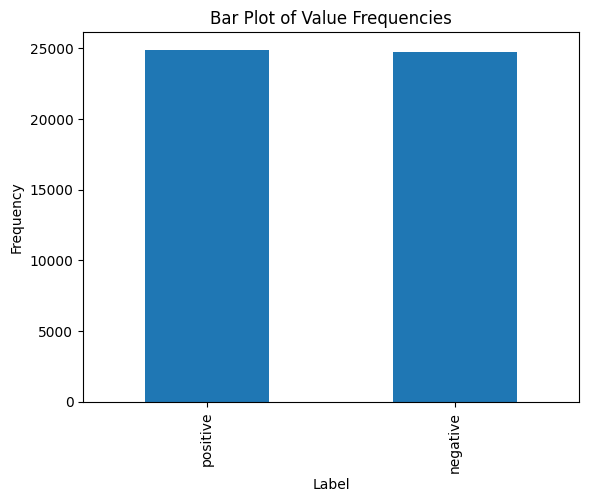

In [ ]:

# Count the frequencies of each category
label_counts = df['sentiment'].value_counts()

# Create a bar plot of the frequencies
plot = label_counts.plot(kind='bar')

# Add title and labels
plt.title('Bar Plot of Value Frequencies')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [ ]:
# Montar el drive
drive.mount('/content/drive')

# Guardar el dataset en un archivo CSV en tu drive
df.to_csv('/content/drive/My Drive/imdb_new_dataset.csv', index=True)

Mounted at /content/drive
